In [1]:
##Importing the necessary libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm,skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [2]:
##Getting the path of current working directory

os.getcwd()

'C:\\Users\\ASUS\\OneDrive\\Machine learning projects\\Loan_approval_project'

In [3]:
path=r'C:\\Users\\ASUS\\OneDrive\\Machine learning projects\\Loan_approval_project'

In [4]:
##Listing all files in a given path

files=os.listdir(path)
files

['.ipynb_checkpoints',
 'catboost_info',
 'Loan_Approval.ipynb',
 'test.csv',
 'train.csv',
 'Untitled.ipynb']

In [5]:
##Looking at first few rows of each file

for file in files:
    if file.endswith('.csv'):
        filepath=os.path.join(path,file)
        df=pd.read_csv(filepath)
        print(f'Dataset:{file}')
        print(df.head())
        print('\n')

Dataset:test.csv
      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N        

In [6]:
##Reading the data

train=pd.read_csv(path+'\\train.csv')
test=pd.read_csv(path+'\\test.csv')

In [7]:
train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [8]:
test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


## EDA:

In [9]:
df=train.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [11]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [12]:
##Checking for null values

df.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

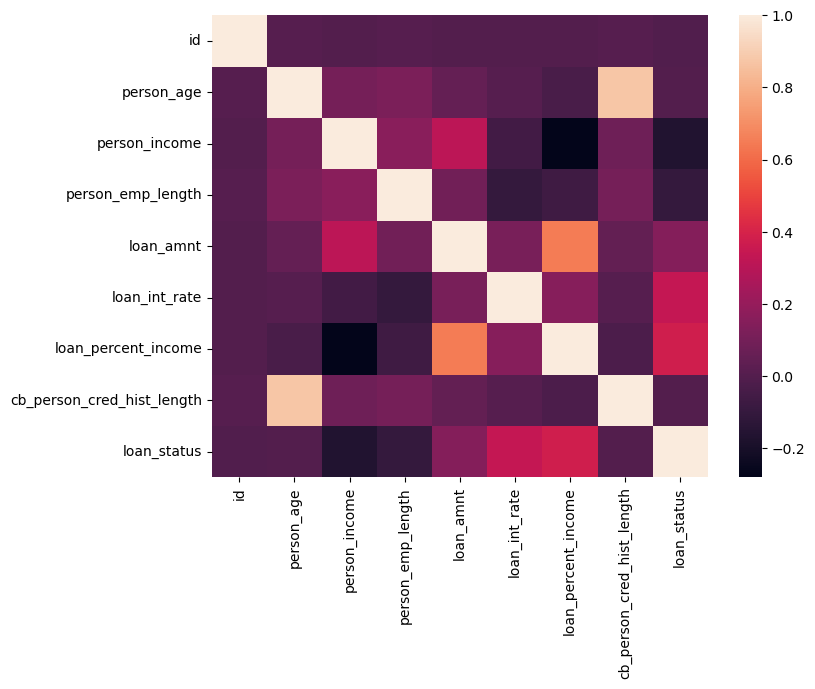

In [13]:
##Lets see correlation between variables

corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='count'>

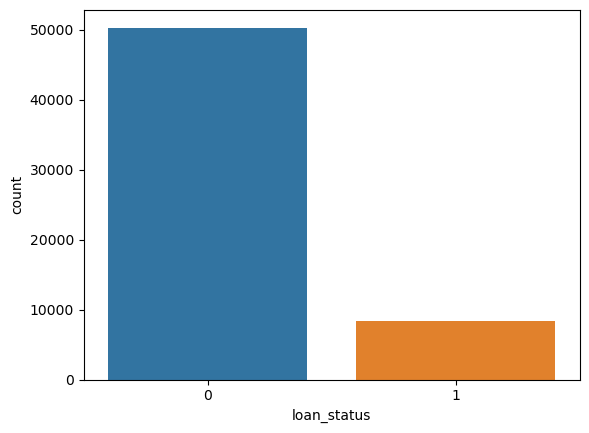

In [14]:
sns.countplot(x='loan_status',data=df)

In [15]:
print('Loan approved:{}'.format(len(df[df['loan_status']==1])))
print('Loan rejected:{}'.format(len(df[df['loan_status']==0])))

Loan approved:8350
Loan rejected:50295


In [16]:
##Dropping unnecessary columns

df.drop(['id'],axis=1,inplace=True)
test.drop(['id'],axis=1,inplace=True)

In [17]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [18]:
##Looking at catgorical variable counts

for col in df.select_dtypes(include='object').columns:
    print(f'\n{col}:unique values:')
    print(df[col].value_counts())


person_home_ownership:unique values:
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: person_home_ownership, dtype: int64

loan_intent:unique values:
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: loan_intent, dtype: int64

loan_grade:unique values:
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: loan_grade, dtype: int64

cb_person_default_on_file:unique values:
N    49943
Y     8702
Name: cb_person_default_on_file, dtype: int64


In [19]:
##Storing catgorical and numerical variables in different object to perform EDA

df_num=df.select_dtypes(include=['int64','float64'])
df_cat=df.select_dtypes(include='object')


In [20]:
df_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,37,35000,0.0,6000,11.49,0.17,14,0
1,22,56000,6.0,4000,13.35,0.07,2,0
2,29,28800,8.0,6000,8.90,0.21,10,0
3,30,70000,14.0,12000,11.11,0.17,5,0
4,22,60000,2.0,6000,6.92,0.10,3,0
...,...,...,...,...,...,...,...,...
58640,34,120000,5.0,25000,15.95,0.21,10,0
58641,28,28800,0.0,10000,12.73,0.35,8,1
58642,23,44000,7.0,6800,16.00,0.15,2,1
58643,22,30000,2.0,5000,8.90,0.17,3,0


In [21]:
df_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

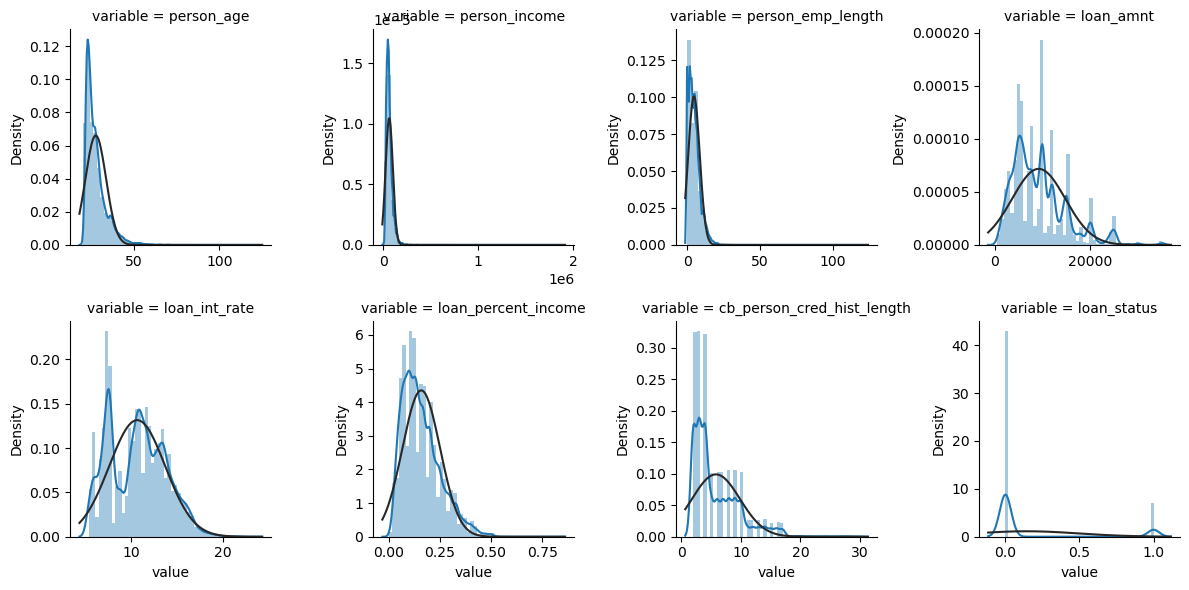

In [22]:
##Plotting a histogram for numeric variables to see how they are ditributed

f=pd.melt(df_num,value_vars=df_num.columns)
g=sns.FacetGrid(f,col='variable',col_wrap=4,sharex=False,sharey=False)
g.map(lambda _x,**kwargs:sns.distplot(_x,fit=norm),'value')
plt.show()

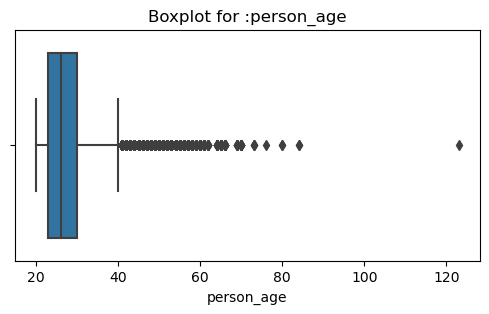

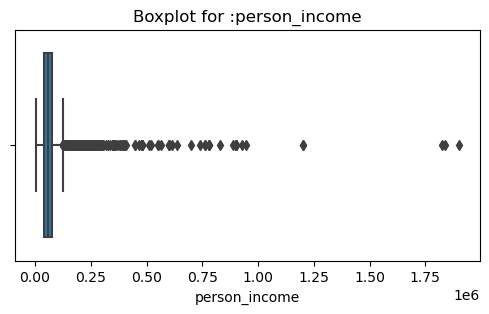

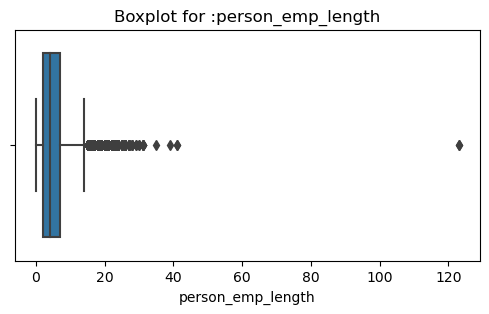

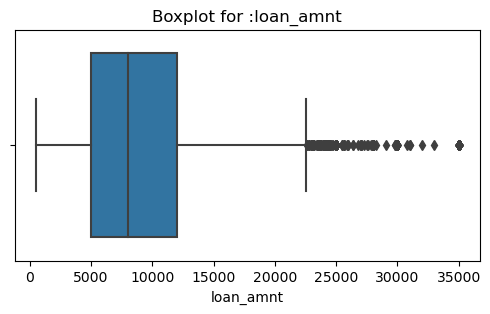

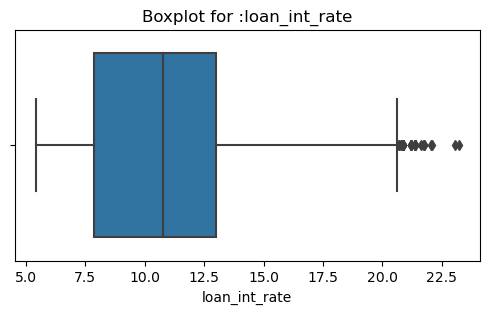

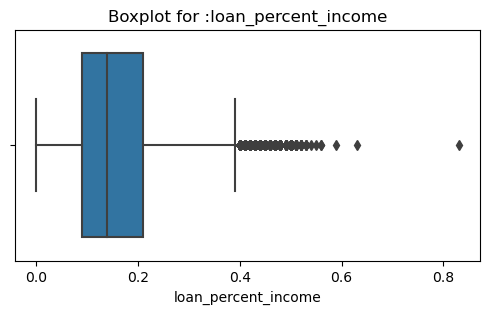

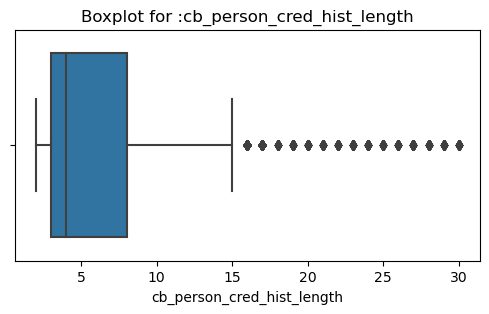

In [23]:
##Boxplot for numerical features to check for any outliers

for col in df_num.columns:
    if col!='loan_status':
        plt.figure(figsize=(6,3))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for :{col}')
        plt.show()
                  
    

In [24]:
df=df[df['person_age']!=123]

In [25]:
outlier_report = {}
for col in ['person_age','loan_amnt', 'loan_int_rate', 'person_income', 'person_emp_length', 'loan_percent_income']:
        q1, q3 = df[col].quantile([0.25, 0.75])
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR

        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        total_count = df.shape[0]
        outlier_percentage = (outlier_count / total_count) * 100

        outlier_report[col] = round(outlier_percentage, 2)


In [26]:
outlier_report

{'person_age': 4.17,
 'loan_amnt': 3.49,
 'loan_int_rate': 0.06,
 'person_income': 4.11,
 'person_emp_length': 2.17,
 'loan_percent_income': 2.06}

In [27]:
##Defining a preprocessing function

def Preprocessing(df):
    df['cb_person_default_on_file']=df['cb_person_default_on_file'].apply(lambda x:1 if x=='Y' else 0)
    for col in ['loan_amnt','loan_int_rate','person_income','person_emp_length','loan_percent_income']:
        q1,q3=df[col].quantile([0.25,0.75])
        IQR=q3-q1
        lower_bound=q1-1.5*IQR
        upper_bound=q3+1.5*IQR
        median=df[col].median()
        df.loc[df[col]<lower_bound,col]=median
        df.loc[df[col]>upper_bound,col]=median
    df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent','loan_grade'],drop_first=True)
    df = df.astype('float64')
    return df

In [28]:
df1=Preprocessing(df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12112\3821497489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cb_person_default_on_file']=df['cb_person_default_on_file'].apply(lambda x:1 if x=='Y' else 0)


In [29]:
df1

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,37.0,35000.0,0.0,6000.0,11.49,0.17,0.0,14.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,22.0,56000.0,6.0,4000.0,13.35,0.07,0.0,2.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,29.0,28800.0,8.0,6000.0,8.90,0.21,0.0,10.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,70000.0,14.0,12000.0,11.11,0.17,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,22.0,60000.0,2.0,6000.0,6.92,0.10,0.0,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34.0,120000.0,5.0,8000.0,15.95,0.21,1.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58641,28.0,28800.0,0.0,10000.0,12.73,0.35,0.0,8.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
58642,23.0,44000.0,7.0,6800.0,16.00,0.15,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58643,22.0,30000.0,2.0,5000.0,8.90,0.17,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


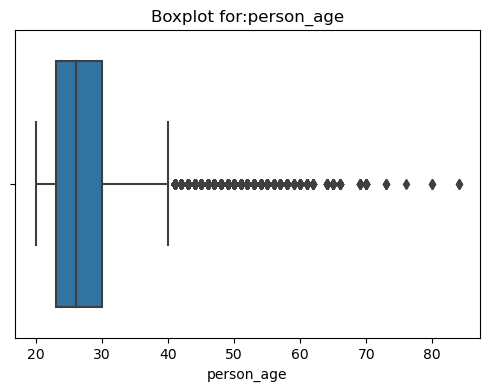

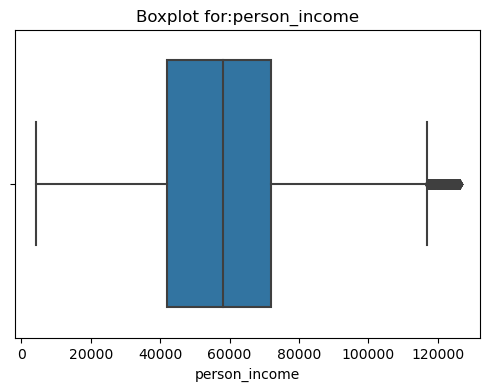

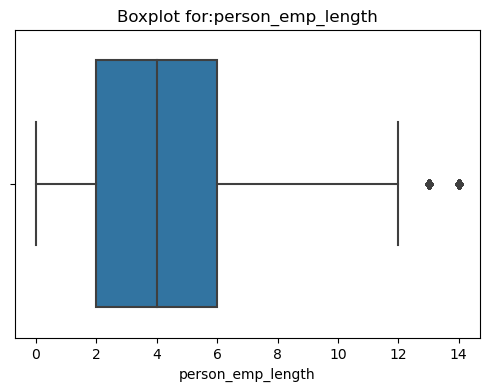

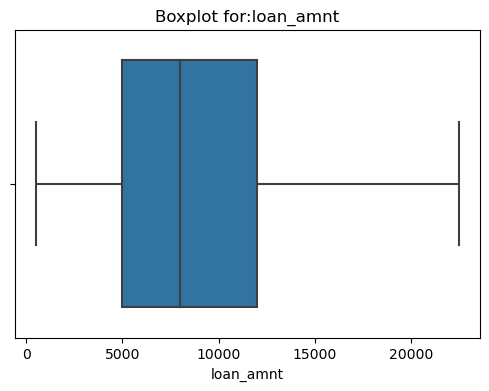

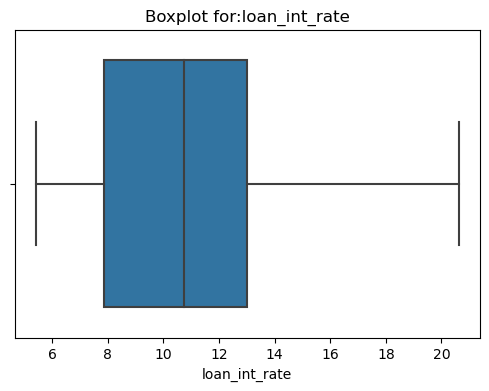

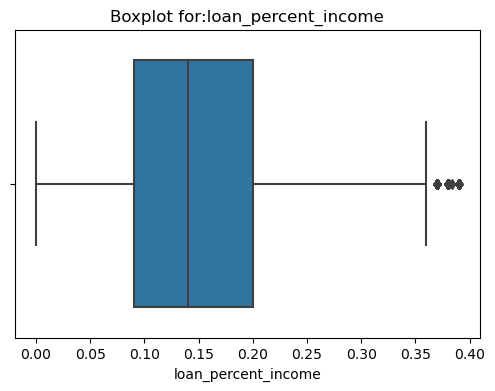

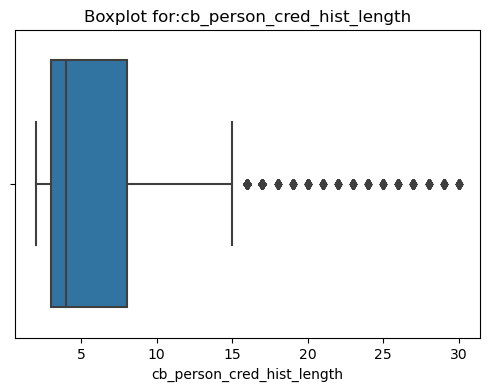

In [30]:
for col in df_num.columns:
    if col=='loan_status':
        continue
    else:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=df1[col])
        plt.title(f'Boxplot for:{col}')
        plt.show()

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58644 entries, 0 to 58644
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_age                   58644 non-null  float64
 1   person_income                58644 non-null  float64
 2   person_emp_length            58644 non-null  float64
 3   loan_amnt                    58644 non-null  float64
 4   loan_int_rate                58644 non-null  float64
 5   loan_percent_income          58644 non-null  float64
 6   cb_person_default_on_file    58644 non-null  float64
 7   cb_person_cred_hist_length   58644 non-null  float64
 8   loan_status                  58644 non-null  float64
 9   person_home_ownership_OTHER  58644 non-null  float64
 10  person_home_ownership_OWN    58644 non-null  float64
 11  person_home_ownership_RENT   58644 non-null  float64
 12  loan_intent_EDUCATION        58644 non-null  float64
 13  loan_intent_HOME

In [32]:
##Creating two different objects for dependent and independent variables

x=df1.drop('loan_status',axis=1)
y=df1['loan_status']

In [33]:
df1.shape

(58644, 23)

## Feature selection:

In [34]:
from sklearn.feature_selection import SelectKBest,f_classif
selector=SelectKBest(score_func=f_classif,k=16)
x_new=selector.fit_transform(x,y)
x_new

array([[3.50e+04, 0.00e+00, 6.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [5.60e+04, 6.00e+00, 4.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [2.88e+04, 8.00e+00, 6.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       ...,
       [4.40e+04, 7.00e+00, 6.80e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [3.00e+04, 2.00e+00, 5.00e+03, ..., 0.00e+00, 0.00e+00, 0.00e+00],
       [7.50e+04, 2.00e+00, 1.50e+04, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [35]:
selected_features = x.columns[selector.get_support()]
selected_features

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_default_on_file',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G'],
      dtype='object')

In [36]:
df2=df1[selected_features]
feature_scores=pd.DataFrame({'Feature':selected_features,'Score':selector.scores_[selector.get_support()]}).sort_values(by='Score',ascending=False)

In [37]:
print(feature_scores)
feature_scores.shape

                       Feature         Score
12                loan_grade_D  10883.072671
3                loan_int_rate   7525.094497
4          loan_percent_income   5469.960033
7   person_home_ownership_RENT   3572.061877
0                person_income   2804.373882
5    cb_person_default_on_file   2124.002328
13                loan_grade_E   2029.094501
2                    loan_amnt    812.758203
1            person_emp_length    743.301100
6    person_home_ownership_OWN    453.044895
11                loan_grade_B    414.290923
14                loan_grade_F    269.563131
10         loan_intent_VENTURE    244.080367
8        loan_intent_EDUCATION    152.977642
9          loan_intent_MEDICAL    141.924458
15                loan_grade_G    123.747503


(16, 2)

In [38]:
##Importing neceesary libraries for model building and evaluation

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve

In [39]:
X=df2
Y=df1['loan_status']

In [40]:
##Splitting the data into train and test datasets

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [41]:
x_train


,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,loan_grade_B,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
14337,50000.0,0.0,7200.0,13.85,0.14,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17117,43200.0,3.0,5000.0,11.66,0.12,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,70000.0,0.0,8000.0,7.88,0.11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55811,75000.0,2.0,15000.0,6.54,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40120,45600.0,5.0,4000.0,7.66,0.09,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54344,72000.0,5.0,12000.0,13.16,0.17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38158,70000.0,1.0,10000.0,6.62,0.14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
860,90000.0,0.0,3350.0,5.42,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,110000.0,2.0,3000.0,13.23,0.03,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
y_train

14337    0.0
17117    0.0
32590    0.0
55811    0.0
40120    0.0
        ... 
54344    0.0
38158    0.0
860      0.0
15795    0.0
56423    0.0
Name: loan_status, Length: 46915, dtype: float64

In [43]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [45]:
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier

In [46]:
##Initialze model creation

log_clf=LogisticRegression()
rf_clf=RandomForestClassifier()
svm_clf=SVC(probability=True)
tree_clf=DecisionTreeClassifier()
lda_clf=LinearDiscriminantAnalysis()
knn_clf=KNeighborsClassifier()

In [ ]:
# #Creating a voting classifier

# voting_clf=VotingClassifier(estimators=[('lr',log_clf),('rf',rf_clf),('svm',svm_clf),('tree',tree_clf),
#                                         ('lda',lda_clf),('knn',knn_clf)],voting='hard')
# voting_clf.fit(x_train,y_train)

In [47]:
#Model evaluation using accuracy
for clf in(log_clf,svm_clf,tree_clf,knn_clf,lda_clf,rf_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.8823429107340779
SVC 0.8607724443686589
DecisionTreeClassifier 0.9050217409838861


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.8937675846193196
LinearDiscriminantAnalysis 0.8849859323045443
RandomForestClassifier 0.9433029243754796


In [48]:
##Model evaluation using Precision

for clf in(log_clf,svm_clf,tree_clf,knn_clf,lda_clf,rf_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,precision_score(y_test,y_pred))

LogisticRegression 0.7111853088480802


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC 0.0
DecisionTreeClassifier 0.6593659942363113


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.6487317448116833
LinearDiscriminantAnalysis 0.619327731092437
RandomForestClassifier 0.8772478498827209


In [49]:
##Model evaluation using recall

for clf in(log_clf,svm_clf,tree_clf,knn_clf,lda_clf,rf_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,recall_score(y_test,y_pred))

LogisticRegression 0.2608695652173913
SVC 0.0
DecisionTreeClassifier 0.6950398040416411


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.516840171463564
LinearDiscriminantAnalysis 0.451316595223515
RandomForestClassifier 0.6876913655848133


In [50]:
##Importing necessary libraries

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score

In [51]:
##Model evaluation using f1_score

for clf in(log_clf,svm_clf,tree_clf,knn_clf,lda_clf,rf_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,f1_score(y_test,y_pred))

LogisticRegression 0.3817204301075268
SVC 0.0
DecisionTreeClassifier 0.6733490566037735


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier 0.5753237900477165
LinearDiscriminantAnalysis 0.5221395678356359
RandomForestClassifier 0.7659574468085106


In [52]:
y_scores=rf_clf.predict_proba(x_test)[:,1]
auc=roc_auc_score(y_test,y_scores)
fpr,tpr,thresholds=roc_curve(y_test,y_scores)

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)


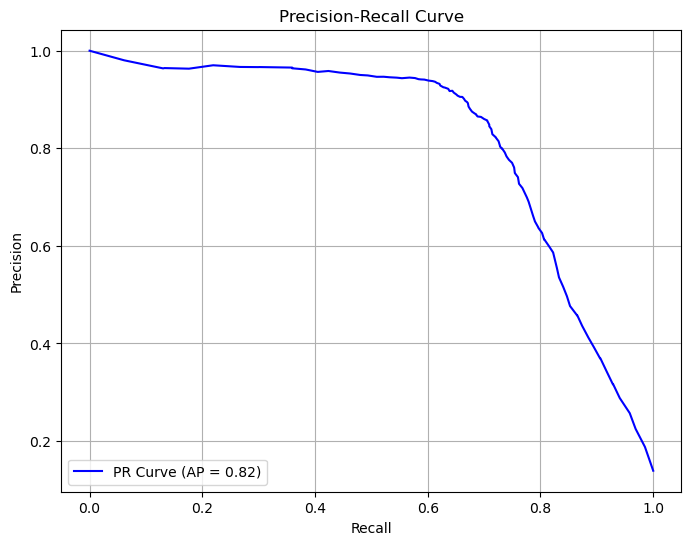

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AP = {avg_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

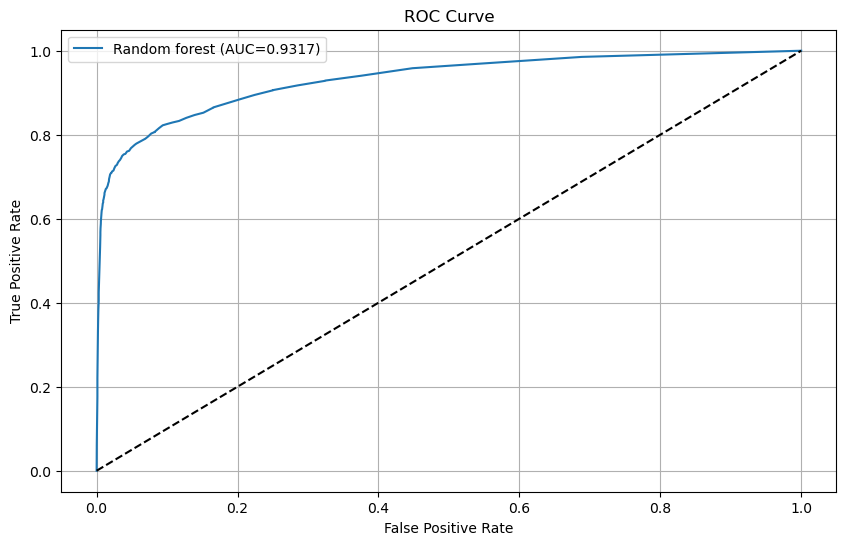

In [56]:
##Plotting the ROC Curve

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label=f'Random forest (AUC={auc:.4f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

In [57]:
# ##Voting classifier using soft voting

# voting_clf_2=VotingClassifier(estimators=[('lr',log_clf),('rf',rf_clf),('svm',svm_clf),('tree',tree_clf),
#                                         ('lda',lda_clf),('knn',knn_clf)],voting='soft')

In [58]:
# ##Model evaluation using roc_auc_score

# for clf in(log_clf,svm_clf,tree_clf,knn_clf,lda_clf,rf_clf,voting_clf_2):
#     clf.fit(x_train,y_train)
#     y_scores=clf.predict_proba(x_test)[:,1]
#     print(clf.__class__.__name__,roc_auc_score(y_test,y_scores))

In [59]:
##Creating a pipeline for boosing algorithms

pipelines = {
    'cb': Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('cb', CatBoostClassifier(random_state=1234, verbose=0))
    ]),
    'xgb': Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('xgb', XGBClassifier(random_state=1234, use_label_encoder=False, eval_metric='logloss'))
    ]),
#     'rf': Pipeline([
#         ('scaler', StandardScaler()),
#         ('smote', SMOTE(random_state=42)),
#         ('rf', RandomForestClassifier())
#     ])
}


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [60]:
##Defining a hyperparameter grid

grid = {
    'cb': {
        'cb__depth': [5],  # Focus around 5
        'cb__learning_rate': [0.14],  # Focus around 0.14
        'cb__iterations': [525],  # Focus around 525
        'cb__l2_leaf_reg': [4.5]  # Focus around 4.5
    },
    'xgb': {
        'xgb__n_estimators': [150, 175, 200],  # Focus around 175
        'xgb__max_depth': [4, 5, 6],  # Focus around 5
        'xgb__learning_rate': [0.19, 0.20, 0.21]  # Finer steps around 0.2
    },
#     'rf':{
#     'rf__n_estimators': [100, 200, 300],          # Number of trees in the forest
#     'rf__max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
#     'rf__min_samples_split': [2, 5, 10],          # Minimum samples required to split a node
#     'rf__min_samples_leaf': [1, 2, 4],            # Minimum samples required at each leaf node
#     'rf__max_features': ['sqrt', 'log2', None],   # Number of features to consider for the best split
#     'rf__bootstrap': [True, False] # Whether to use bootstrap samples
#     },
}

In [61]:
pipelines.items()

dict_items([('cb', Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('cb',
                 <catboost.core.CatBoostClassifier object at 0x000002444D2C1EE0>)])), ('xgb', Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               m

In [62]:
##Hyperparameter tuning and model fiiting using GridSearchCV
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,grid[algo], n_jobs=-1, cv = 5, scoring='roc_auc', verbose = 1)
    model.fit(x_train, y_train)
    fit_models[algo] = model

Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [63]:
##Evalution metrics for Boosting algorithms

for algo,model in fit_models.items():
    print(f'Best Metric for {algo}')
    print(model.best_params_)
    yhat = model.predict(x_test)
    acc = accuracy_score(y_test, yhat)
    recall = recall_score(y_test,yhat)
    pre = precision_score(y_test,yhat)
    y_scores=model.predict_proba(x_test)[:,1]
    roc_auc=roc_auc_score(y_test,y_scores)
    print(f'Metric for{algo}: Accuracy = {acc} -- Recall = {recall} -- Precision -- {pre} -- AUC = {roc_auc}')

Best Metric for cb
{'cb__depth': 5, 'cb__iterations': 525, 'cb__l2_leaf_reg': 4.5, 'cb__learning_rate': 0.14}
Metric forcb: Accuracy = 0.9459459459459459 -- Recall = 0.7287201469687692 -- Precision -- 0.8616944243301955 -- AUC = 0.9536191386935269
Best Metric for xgb
{'xgb__learning_rate': 0.2, 'xgb__max_depth': 6, 'xgb__n_estimators': 200}
Metric forxgb: Accuracy = 0.9447523233012192 -- Recall = 0.7348438456827924 -- Precision -- 0.8480565371024735 -- AUC = 0.9544728536241912


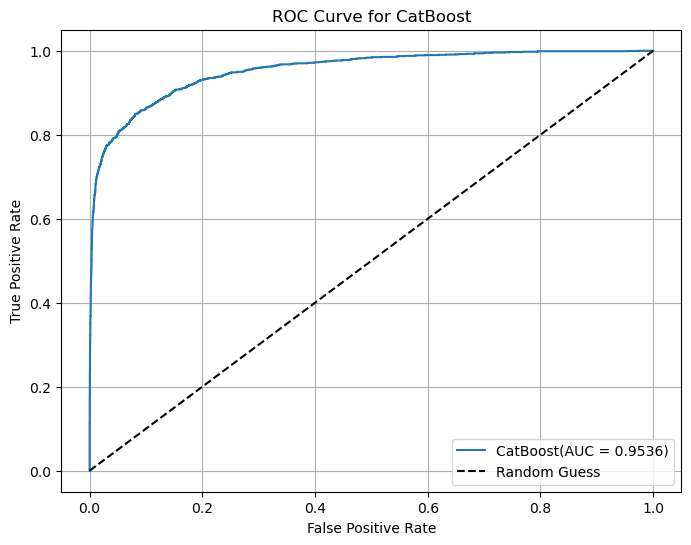

In [64]:
##ROC_CURVE for catboost model

cat_probs = fit_models['cb'].predict_proba(x_test)[:,1] # Take probabilities
fpr,tpr, thresholds = roc_curve(y_test, cat_probs)
roc_auc = roc_auc_score(y_test, cat_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = f'CatBoost(AUC = {roc_auc:.4f})')
plt.plot([0,1],[0,1], 'k--', label = "Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for CatBoost")
plt.legend()
plt.grid()
plt.show()